# pandas

    Pandas stands for panel data structures. It is library built on top of numpy library.
    
    We have 3 kinds of data structures inside pandas.
    
    1. Index
    2. Series
    3. Dataframes
    
    Pandas is used in predictive analysis.

## `importing pandas`

In [1]:
import numpy as np
import pandas as pd

## `creating series`

- We can create pandas series using lists or dictionaries.

In [2]:
country = ['India', 'Pakistan', 'USA', 'Nepal', 'Srilanka']

pd.Series(country)

0       India
1    Pakistan
2         USA
3       Nepal
4    Srilanka
dtype: object

    We can also create a series where the values are integers as well.

In [3]:
runs = [13, 24, 56, 78, 100]
pd.Series(runs)

0     13
1     24
2     56
3     78
4    100
dtype: int64

- We can also give custom index to our series object.

In [4]:
marks = [67, 57, 89, 100]
subjects = ['Maths', 'Science', 'English', 'Hindi']

pd.Series(marks, index=subjects)

Maths       67
Science     57
English     89
Hindi      100
dtype: int64

- We may also a provide a `name` to our series.

In [5]:
marks = [67, 57, 89, 100]
subjects = ['Maths', 'Science', 'English', 'Hindi']

pd.Series(marks, index = subjects, name = 'Daniyaal marks')

Maths       67
Science     57
English     89
Hindi      100
Name: Daniyaal marks, dtype: int64

## `creating series from dictionaries`

    We can also create a series object by passing in a dictionary in the pd.Series() method.

In [6]:
marks_dictionary = {subject:score for subject, score in zip(subjects, marks)}
marks_dictionary

{'Maths': 67, 'Science': 57, 'English': 89, 'Hindi': 100}

In [16]:
marks_ser = pd.Series(marks_dictionary)
marks_ser

Maths       67
Science     57
English     89
Hindi      100
dtype: int64

## `attributes of series`

    Since at the end of day, series are python objects, each series instance has certain attributes associated to it.

In [17]:
marks_ser

Maths       67
Science     57
English     89
Hindi      100
dtype: int64

In [18]:
marks_ser.size

4

In [19]:
marks_ser.dtype

dtype('int64')

In [20]:
marks_ser.shape

(4,)

In [21]:
marks_ser.index

Index(['Maths', 'Science', 'English', 'Hindi'], dtype='object')

In [22]:
marks_ser.values

array([ 67,  57,  89, 100], dtype=int64)

In [24]:
marks_ser.is_unique # Tells if all the values are unique or not

True

In [27]:
pd.Series([1, 2, 3, 4, np.nan, 5, 6, np.nan]).is_unique

False

In [25]:
marks_ser.hasnans # Tells if the series has any missing values or not

False

In [26]:
pd.Series([1, 2, 3, 4, np.nan, 5, 6, np.nan]).hasnans

True

## `importing series from read_csv`

    The read_csv() method is used primarily for reading data frames. However, if our csv file has only 2 columns or
    1 columns, then we can squeeze it and get a series object.

In [29]:
pd.read_csv('./content/subs.csv')

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [31]:
subs = pd.read_csv('./content/subs.csv').squeeze(True)
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

    When there are more than 1 column in the csv file, then we also need to tell pandas about which column to use as
    index column. We can do this by passing in the name of that column in the index_col parameter or we may also pass
    the column index of that column.

In [33]:
pd.read_csv('./content/kohli_ipl.csv', index_col = 0)

,runs
match_no,
1,1
2,23
3,13
4,12
5,1
...,...
211,0
212,20
213,73


In [42]:
virat_kohli_scores = pd.read_csv('./content/kohli_ipl.csv', index_col = 0).squeeze(True)
virat_kohli_scores

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [45]:
movies = pd.read_csv('./content/bollywood.csv', index_col = 'movie').squeeze(True)
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

    We can remove the movie which is on the top of this column.

In [46]:
movies.index.name = None

In [47]:
movies

Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

## `series methods`

    Since series are objects, we have certain methods associated with each series object.

### `count()`
- `count()` method gives us the number of non-missing values in a series. This is different from `size` attribute.
- The `size` attribute gives the total number of values.

In [48]:
exp = pd.Series([1, 2, 3, 4, np.nan, 6, 7, np.nan, 9, np.nan])
exp

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    6.0
6    7.0
7    NaN
8    9.0
9    NaN
dtype: float64

In [49]:
exp.size, exp.count()

(10, 7)

### `value_counts()`

- The `value_counts()` method is used to give the frequency of each value in the form of a series.
- The `value_counts()` method by default does not includes the count of `NaN`.
- If we want to include the count of `NaN`, then we need to pass `dropna = False`.

In [50]:
movies

Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [51]:
movies.value_counts()

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
                    ..
Diganth              1
Parveen Kaur         1
Seema Azmi           1
Akanksha Puri        1
Edwin Fernandes      1
Name: count, Length: 566, dtype: int64

In [54]:
names = pd.Series(['Abhishek', 'Abhishek', 'Amrusha', 'Amrusha', 'Priyanka', 'Daniyaal', np.nan, np.nan,'Sameer'])
names

0    Abhishek
1    Abhishek
2     Amrusha
3     Amrusha
4    Priyanka
5    Daniyaal
6         NaN
7         NaN
8      Sameer
dtype: object

In [55]:
names.value_counts()

Abhishek    2
Amrusha     2
Priyanka    1
Daniyaal    1
Sameer      1
Name: count, dtype: int64

    As we can see that it does not include the count of missing values by default. However, we can include the count
    of missing values by setting dropna = False.

In [56]:
names.value_counts(dropna = False)

Abhishek    2
Amrusha     2
NaN         2
Priyanka    1
Daniyaal    1
Sameer      1
Name: count, dtype: int64

### `head(), tail() and sample()`

- These methods are used to look at the dataframe entries. They do not return us a copy of the items.
- These methods return us a view and NOT a copy.

In [57]:
movies

Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [58]:
movies.head() # by default it gives us the 5 movies from the start

Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
Name: lead, dtype: object

In [59]:
movies.tail() # by default it gives us the 5 movies from the last

Hum Tumhare Hain Sanam      Shah Rukh Khan
Aankhen (2002 film)       Amitabh Bachchan
Saathiya (film)               Vivek Oberoi
Company (film)                  Ajay Devgn
Awara Paagal Deewana          Akshay Kumar
Name: lead, dtype: object

In [60]:
movies.sample() # randomly returns us a movie from the movies dataframe

Riyasat (film)    Rajesh Khanna
Name: lead, dtype: object

In [62]:
movies.sample(5) # returns 5 random movies from the movies dataframe

Irada (2017 film)              Naseeruddin Shah
Jhootha Hi Sahi                    John Abraham
Shahid (film)                     Rajkummar Rao
Beiimaan Love                       Sunny Leone
Children of War (2014 film)       Farooq Shaikh
Name: lead, dtype: object

### `sort_values() and sort_index()`

    The sort_values() and sort_index() method is used to sort the series based on values and index.
    These methods return us a new series.

In [63]:
movies

Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [65]:
sorted_movies_by_actors = movies.sort_values()
sorted_movies_by_actors

Qaidi Band                            Aadar Jain
Roar: Tigers of the Sundarbans      Aadil Chahal
Lipstick Under My Burkha            Aahana Kumra
Raat Gayi Baat Gayi?                Aamir Bashir
Talaash: The Answer Lies Within       Aamir Khan
                                        ...     
Dil Toh Deewana Hai                  Zeenat Aman
Sallu Ki Shaadi                      Zeenat Aman
Strings of Passion                   Zeenat Aman
Dunno Y... Na Jaane Kyon             Zeenat Aman
Taj Mahal: An Eternal Love Story     Zulfi Sayed
Name: lead, Length: 1500, dtype: object

- The `sorted_movies_by_actors` and `movies` are two different series objects. We can check this by `id()` method.

In [66]:
id(sorted_movies_by_actors) == id(movies)

False

- Similarily, we can sort by the index of a series.

In [67]:
sorted_movies_by_index = movies.sort_index()
sorted_movies_by_index

1920 (film)                   Rajniesh Duggall
1920: London                     Sharman Joshi
1920: The Evil Returns             Vicky Ahuja
1971 (2007 film)                Manoj Bajpayee
2 States (2014 film)              Arjun Kapoor
                                   ...        
Zindagi 50-50                      Veena Malik
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi Tere Naam           Mithun Chakraborty
Zokkomon                       Darsheel Safary
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Name: lead, Length: 1500, dtype: object

- The `sorted_movies_by_index` and `movies` are 2 different objects.

In [68]:
id(sorted_movies_by_index) == id(movies)

False

#### `inplace = True`

    If we want that the sorting happens in the original series object, then we can use inplace = True.

## `series mathematical methods`

In [71]:
virat_kohli_scores

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [72]:
virat_kohli_scores.index.name = None

In [73]:
virat_kohli_scores

1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [74]:
virat_kohli_scores.sum()

6634

In [75]:
virat_kohli_scores.mean()

30.855813953488372

In [76]:
virat_kohli_scores.min()

0

In [77]:
virat_kohli_scores.max()

113

In [78]:
virat_kohli_scores.prod()

0

In [79]:
virat_kohli_scores.median()

24.0

In [80]:
virat_kohli_scores.mode()

0    0
Name: runs, dtype: int64

In [81]:
virat_kohli_scores.describe()

count    215.000000
mean      30.855814
std       26.229801
min        0.000000
25%        9.000000
50%       24.000000
75%       48.000000
max      113.000000
Name: runs, dtype: float64

## `retrieving an item from the series`

    We can either use the custom index or the pandas default numeric index in order to retrieve an item from the
    series.

In [82]:
movies

Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [83]:
movies[1]

C:\Users\HU496FA\AppData\Local\Temp\ipykernel_13720\1023273493.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movies[1]


'Vicky Ahuja'

In [84]:
movies['Battalion 609']

'Vicky Ahuja'

- We can also do slicing in pandas series.

In [85]:
movies[1:5] # pick the items from index 1 to 5(excluded)

Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
Name: lead, dtype: object

- However, when we use custom indexing then the last index is also included.

In [86]:
movies['Battalion 609' : 'Awara Paagal Deewana']

Battalion 609                                    Vicky Ahuja
The Accidental Prime Minister (film)             Anupam Kher
Why Cheat India                                Emraan Hashmi
Evening Shadows                             Mona Ambegaonkar
Soni (film)                             Geetika Vidya Ohlyan
                                                ...         
Hum Tumhare Hain Sanam                        Shah Rukh Khan
Aankhen (2002 film)                         Amitabh Bachchan
Saathiya (film)                                 Vivek Oberoi
Company (film)                                    Ajay Devgn
Awara Paagal Deewana                            Akshay Kumar
Name: lead, Length: 1499, dtype: object

## `editing series`

    We can edit a value in the series just by reassigning it.

In [87]:
marks_ser

Maths       67
Science     57
English     89
Hindi      100
dtype: int64

In [88]:
marks_ser.loc['Maths']  = 95 # Kyunki Abhishek Maths topper tha

In [89]:
marks_ser

Maths       95
Science     57
English     89
Hindi      100
dtype: int64

- We can also add new item in the series using the same syntax as above.

In [90]:
marks_ser['Physics'] = 67

In [91]:
marks_ser

Maths       95
Science     57
English     89
Hindi      100
Physics     67
dtype: int64

- We can also change multiple values at the same time using fancy indexing.

In [92]:
marks_ser.loc[['Maths', 'Science', 'English']] = [99, 98, 96]

In [93]:
marks_ser

Maths       99
Science     98
English     96
Hindi      100
Physics     67
dtype: int64

- We can also change values by using slicing.

In [94]:
marks_ser

Maths       99
Science     98
English     96
Hindi      100
Physics     67
dtype: int64

In [95]:
marks_ser[1:4] = 32 # failed in Science, English, Hindi 🥺

In [96]:
marks_ser

Maths      99
Science    32
English    32
Hindi      32
Physics    67
dtype: int64

- While using slicing, we may also use custom indexing to change the values.
- However, in slicing using custom indexing last index would also be included.

In [97]:
marks_ser['Science' : 'Hindi'] = 99

In [99]:
marks_ser

Maths      99
Science    99
English    99
Hindi      99
Physics    67
dtype: int64

## `series with python functions`

In [100]:
marks_ser

Maths      99
Science    99
English    99
Hindi      99
Physics    67
dtype: int64

In [101]:
len(marks_ser)

5

In [102]:
list(marks_ser)

[99, 99, 99, 99, 67]

In [103]:
dict(marks_ser)

{'Maths': 99, 'Science': 99, 'English': 99, 'Hindi': 99, 'Physics': 67}

In [104]:
tuple(marks_ser)

(99, 99, 99, 99, 67)

In [105]:
set(marks_ser)

{67, 99}

In [106]:
sorted(marks_ser)

[67, 99, 99, 99, 99]

In [107]:
min(marks_ser)

67

In [108]:
max(marks_ser)

99

### `membership operator and looping in series`

In [111]:
marks_ser

Maths      99
Science    99
English    99
Hindi      99
Physics    67
dtype: int64

In [113]:
for value in marks_ser: # By default the membership operator looks for values in the series and not index
    print(value)

99
99
99
99
67


    If we want to specifically look for values, then we can use index attribute while looping.

In [114]:
for subject in marks_ser.index:
    print(subject)

Maths
Science
English
Hindi
Physics


    The membership operator in by default looks for keys and not for values.

In [115]:
99 in marks_ser # as in operator searches in keys and not values

False

In [116]:
'Maths' in marks_ser

True

- If we want to search inside the values, then we need to use the values attribute.

In [118]:
marks_ser

Maths      99
Science    99
English    99
Hindi      99
Physics    67
dtype: int64

In [119]:
99 in marks_ser.values

True

    We can iterate over keys and values at the same time using items() method. This returns a zip object
    which we can then iterate over (as zip is an iterator).

In [123]:
for subject, marks in marks_ser.items():
        print(f"Marks({subject}) = {marks}")

Marks(Maths) = 99
Marks(Science) = 99
Marks(English) = 99
Marks(Hindi) = 99
Marks(Physics) = 67


## `mathematical and relational operators and boolean masking`

In [124]:
virat_kohli_scores

1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

    We can add two series objects, multiply, subtract, divide, power etc...
    Here also, we have the concept of broadcasting.

In [125]:
virat_kohli_scores + 100 # (broadcasting)

1      101
2      123
3      113
4      112
5      101
      ... 
211    100
212    120
213    173
214    125
215    107
Name: runs, Length: 215, dtype: int64

In [126]:
virat_kohli_scores - 100

1      -99
2      -77
3      -87
4      -88
5      -99
      ... 
211   -100
212    -80
213    -27
214    -75
215    -93
Name: runs, Length: 215, dtype: int64

In [127]:
virat_kohli_scores * 100

1       100
2      2300
3      1300
4      1200
5       100
       ... 
211       0
212    2000
213    7300
214    2500
215     700
Name: runs, Length: 215, dtype: int64

In [128]:
virat_kohli_scores / 100

1      0.01
2      0.23
3      0.13
4      0.12
5      0.01
       ... 
211    0.00
212    0.20
213    0.73
214    0.25
215    0.07
Name: runs, Length: 215, dtype: float64

In [129]:
virat_kohli_scores ** 2

1         1
2       529
3       169
4       144
5         1
       ... 
211       0
212     400
213    5329
214     625
215      49
Name: runs, Length: 215, dtype: int64

### `relational operators`

    The relational operators just return a new boolean series. We can use this series to pass
    it inside the [] to get the filtered result.

In [131]:
mask = virat_kohli_scores > 50
mask

1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213     True
214    False
215    False
Name: runs, Length: 215, dtype: bool

In [132]:
virat_kohli_scores[mask]

34      58
41      71
44      56
45      67
52      70
57      57
68      73
71      51
73      58
74      65
80      57
81      93
82      99
85      56
97      67
99      73
103     51
104     62
110     82
116     75
117     79
119     80
120    100
122     52
123    108
126    109
127     75
128    113
129     54
131     54
132     62
134     64
137     55
141     58
144     57
145     92
148     68
152     70
160     84
162     67
164    100
175     72
178     90
188     72
197     51
198     53
209     58
213     73
Name: runs, dtype: int64

### `Find all the Ajay Devgn movies.`

In [133]:
movies

Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [135]:
mask = movies == 'Ajay Devgn'
mask

Uri: The Surgical Strike                False
Battalion 609                           False
The Accidental Prime Minister (film)    False
Why Cheat India                         False
Evening Shadows                         False
                                        ...  
Hum Tumhare Hain Sanam                  False
Aankhen (2002 film)                     False
Saathiya (film)                         False
Company (film)                           True
Awara Paagal Deewana                    False
Name: lead, Length: 1500, dtype: bool

In [136]:
movies[mask]

Total Dhamaal                       Ajay Devgn
De De Pyaar De                      Ajay Devgn
Raid (2018 film)                    Ajay Devgn
Golmaal Again                       Ajay Devgn
Shivaay                             Ajay Devgn
Drishyam (2015 film)                Ajay Devgn
Himmatwala (2013 film)              Ajay Devgn
Son of Sardaar                      Ajay Devgn
Dil Toh Baccha Hai Ji               Ajay Devgn
Singham                             Ajay Devgn
Rascals (2011 film)                 Ajay Devgn
Once Upon a Time in Mumbaai         Ajay Devgn
Aakrosh (2010 film)                 Ajay Devgn
Toonpur Ka Super Hero               Ajay Devgn
Golmaal Returns                     Ajay Devgn
Halla Bol                           Ajay Devgn
Sunday (2008 film)                  Ajay Devgn
U Me Aur Hum                        Ajay Devgn
Cash (2007 film)                    Ajay Devgn
Golmaal: Fun Unlimited              Ajay Devgn
Dharti Kahe Pukar Ke (2006 film)    Ajay Devgn
Omkara (2006 

### `Find all the matches in which virat kohli scored between 80 and 100`

In [139]:
mask = (virat_kohli_scores > 80) & (virat_kohli_scores < 100)
mask

1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213    False
214    False
215    False
Name: runs, Length: 215, dtype: bool

In [140]:
mask.sum() # Finds the total number of True values inside the boolean series

6

In [141]:
virat_kohli_scores[mask]

81     93
82     99
110    82
145    92
160    84
178    90
Name: runs, dtype: int64

### `Find the number of ducks scored by virat kohli.`

In [142]:
virat_kohli_scores

1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [143]:
mask = virat_kohli_scores == 0
mask

1      False
2      False
3      False
4      False
5      False
       ...  
211     True
212    False
213    False
214    False
215    False
Name: runs, Length: 215, dtype: bool

In [145]:
ans = mask.sum()
ans

9

## `Find all actors who have made more than 20 movies.`

In [146]:
movies

Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [148]:
freq = movies.value_counts()
freq

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
                    ..
Diganth              1
Parveen Kaur         1
Seema Azmi           1
Akanksha Puri        1
Edwin Fernandes      1
Name: count, Length: 566, dtype: int64

In [153]:
freq.index.name = None
freq

Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
                    ..
Diganth              1
Parveen Kaur         1
Seema Azmi           1
Akanksha Puri        1
Edwin Fernandes      1
Name: count, Length: 566, dtype: int64

In [154]:
mask = (freq > 20)
mask

Akshay Kumar         True
Amitabh Bachchan     True
Ajay Devgn           True
Salman Khan          True
Sanjay Dutt          True
                    ...  
Diganth             False
Parveen Kaur        False
Seema Azmi          False
Akanksha Puri       False
Edwin Fernandes     False
Name: count, Length: 566, dtype: bool

In [155]:
freq[mask]

Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Shah Rukh Khan      22
Emraan Hashmi       21
Name: count, dtype: int64

In [156]:
ans = freq[mask].index.tolist()
ans

['Akshay Kumar',
 'Amitabh Bachchan',
 'Ajay Devgn',
 'Salman Khan',
 'Sanjay Dutt',
 'Shah Rukh Khan',
 'Emraan Hashmi']

## `plotting series`

<Axes: >

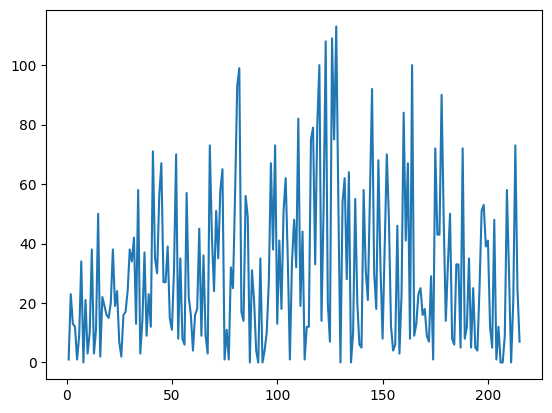

In [160]:
virat_kohli_scores.plot()

<Axes: xlabel='lead'>

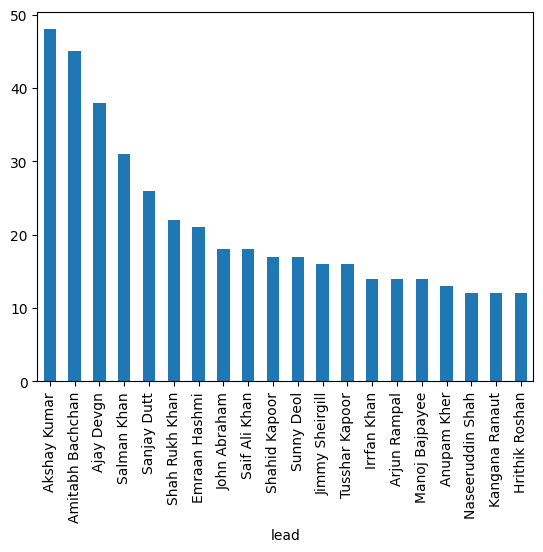

In [164]:
movies.value_counts().head(20).plot(kind = 'bar')

<Axes: ylabel='count'>

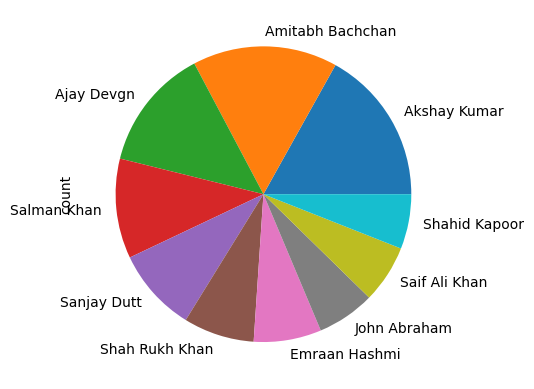

In [167]:
movies.value_counts().head(10).plot(kind = 'pie')